In [1]:
import sys
sys.path.insert(0, '../')
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import ProcessPoolExecutor
import threading
import matplotlib
# matplotlib.use('Agg')  # 使用非 GUI 后端

from dasQt import das
from fkFilter import fkFilter


dir_path = pathlib.Path('/Volumes/CSIM_LAB/DATA/Car-JLU-2024-01-31/ovlink/2024-02-01')
files = sorted(dir_path.glob('*.dat'))
save_path = pathlib.Path('2024-02-01-gray-FK')



In [2]:
file = files[0]

das1 = das.DAS()
das1.readData(file)
das1.RawDataBpFilter(0.01, 0.02, 2.0, 2.1)


2024-03-13 20:20:36,006 INFO	das: 153	
2024-02-01-07-23-55-out.dat read done!


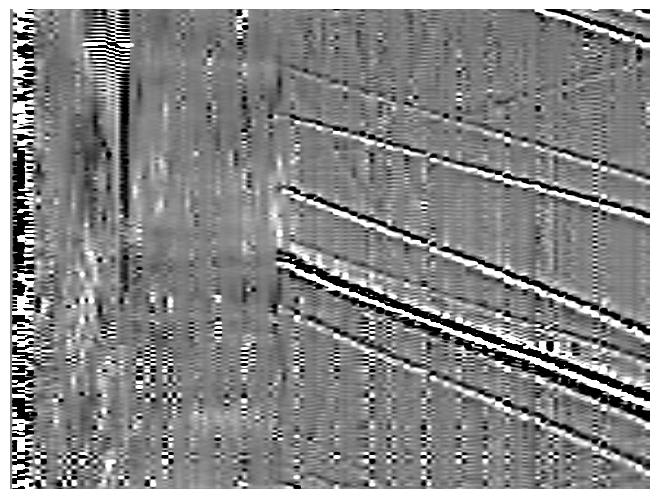

In [4]:
scale = 0.001

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis("off")
ax.imshow(das1.data, cmap='grey', aspect='auto', 
            vmin=-scale, vmax=scale, interpolation='bilinear')
ax.margins(0)
# fig.savefig(f'{save_path/file.stem}.png', bbox_inches='tight', pad_inches=0, dpi=40)
# plt.close()
plt.show()

/Users/zhiyuzhang/MyProjects/dasQt/CUT/fkFilter.py:60: ComplexWarning: Casting complex values to real discards the imaginary part
  mmd[iw-1, ik-1] = m[iw + nw - 3, ik-1] * fac


(120000, 72)


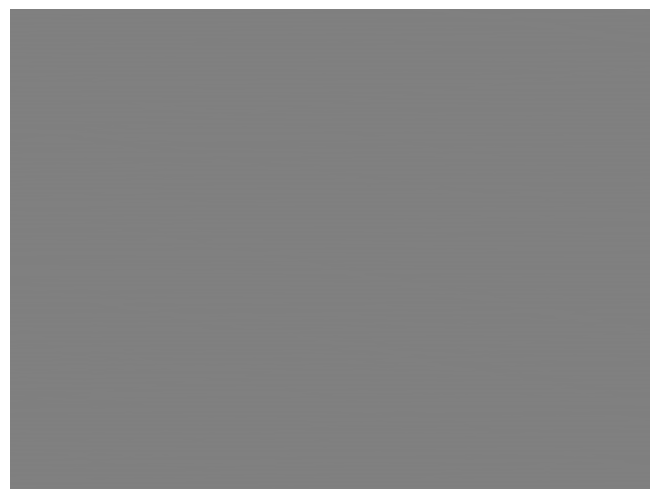

In [5]:
data = das1.data[:, 73:-1]
data = fkFilter(data, 0, 100, 200, 300, 1)
print(data.shape)
scale = 0.001

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis("off")
ax.imshow(data, cmap='grey', aspect='auto', 
            vmin=-scale, vmax=scale, interpolation='bilinear')
ax.margins(0)
# fig.savefig(f'{save_path/file.stem}.png', bbox_inches='tight', pad_inches=0, dpi=40)
# plt.close()
plt.show()

In [7]:
from scipy import io as sio


mat = sio.loadmat('./2024-02-01-mat/2024-02-01-07-23-55-out.mat')

In [9]:
data = mat['data']
dx = mat['dx']
dt = mat['dt']

print(data.shape, dx, dt)


(120000, 72) [[2.042183]] [[0.0005]]
